In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data set and basic eda

dt=pd.read_csv('SalaryData_Train.csv')

In [3]:
dt.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
dt.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
30160,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
dt.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
dt.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:xlabel='educationno', ylabel='age'>

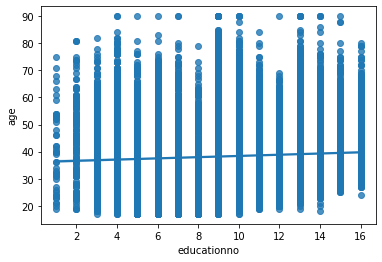

In [8]:
import seaborn as sns
sns.regplot(x=dt['educationno'],y=dt['age'])

Text(0.5, 1.0, 'Scatter plot')

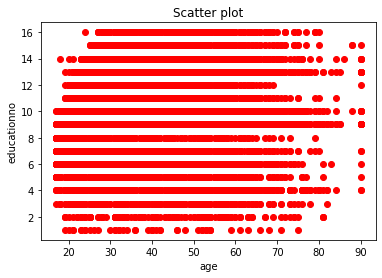

In [9]:
import matplotlib.pyplot as plt
plt.scatter(x=dt['age'],y=dt['educationno'],color='Red')
plt.xlabel('age')
plt.ylabel('educationno') 
plt.title('Scatter plot')

In [10]:
# labeling the data set
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

dt['workclass']=le.fit_transform(dt['workclass'])
dt['education']=le.fit_transform(dt['education'])
dt['maritalstatus']=le.fit_transform(dt['maritalstatus'])
dt['occupation']=le.fit_transform(dt['occupation'])
dt['relationship']=le.fit_transform(dt['relationship'])
dt['race']=le.fit_transform(dt['race'])
dt['sex']=le.fit_transform(dt['sex'])
dt['native']=le.fit_transform(dt['native'])
dt['Salary']=le.fit_transform(dt['Salary'])

In [11]:
# split the data 
X=dt.drop(['Salary'],axis=1)
Y=dt['Salary']

In [12]:
# test and train the data set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [13]:
# Model fitting using  GaussianNB
from sklearn.naive_bayes import GaussianNB
model1=GaussianNB()
model1.fit(X_train,Y_train)

GaussianNB()

In [14]:
print('training accuracy:',model1.score(X_train,Y_train))
print('testing accuracy:',model1.score(X_test,Y_test))

training accuracy: 0.7968335543766578
testing accuracy: 0.7908171722194597


In [15]:
# Model fitting using MultinomialNB
from sklearn.naive_bayes import MultinomialNB
model2=MultinomialNB()
model2.fit(X_train,Y_train)

MultinomialNB()

In [16]:
print('training accuracy:',model2.score(X_train,Y_train))
print('testing accuracy:',model2.score(X_test,Y_test))

training accuracy: 0.7741627984084881
testing accuracy: 0.7679429802751533


In [17]:
# # Model fitting using CategoricalNB
from sklearn.naive_bayes import CategoricalNB
model3=CategoricalNB()
model3.fit(X_train,Y_train)

CategoricalNB()

In [18]:
print('training accuracy:',model3.score(X_train,Y_train))
print('testing accuracy:',model3.score(X_test,Y_test))

training accuracy: 0.8578000663129973
testing accuracy: 0.8582794629537543


In [19]:
# Model fitting using ernoulliNB

from sklearn.naive_bayes import BernoulliNB
model4=BernoulliNB()
model4.fit(X_train,Y_train)

BernoulliNB()

In [20]:
print('training accuracy:',model4.score(X_train,Y_train))
print('testing accuracy:',model4.score(X_test,Y_test))

training accuracy: 0.7265003315649867
testing accuracy: 0.7223603514006298


In [21]:
# Model fitting using ComplementNB
from sklearn.naive_bayes import ComplementNB
model5=BernoulliNB()
model5.fit(X_train,Y_train)

BernoulliNB()

In [22]:
print('training accuracy:',model5.score(X_train,Y_train))
print('testing accuracy:',model5.score(X_test,Y_test))

training accuracy: 0.7265003315649867
testing accuracy: 0.7223603514006298


# predicted the salary using test data set

In [23]:
df=pd.read_csv('SalaryData_Test.csv')

In [24]:
df.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [25]:
df['workclass']=le.fit_transform(df['workclass'])
df['education']=le.fit_transform(df['education'])
df['maritalstatus']=le.fit_transform(df['maritalstatus'])
df['occupation']=le.fit_transform(df['occupation'])
df['relationship']=le.fit_transform(df['relationship'])
df['race']=le.fit_transform(df['race'])
df['sex']=le.fit_transform(df['sex'])
df['native']=le.fit_transform(df['native'])
df['Salary']=le.fit_transform(df['Salary'])

In [26]:
test_data=df.iloc[:,0:13]

In [27]:
salart_pred_test=pd.Series(model3.predict(test_data))
salart_pred_test

0        0
1        0
2        0
3        1
4        0
        ..
15055    0
15056    0
15057    1
15058    0
15059    1
Length: 15060, dtype: int32

In [28]:
df['salart_pred_test']=pd.Series(salart_pred_test)
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,salart_pred_test
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1,0
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0,1
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0,0
